# Import Lib and Data and Config

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.stats import zscore

In [3]:
url = "./adult.data"
columns = ["age", "work-class", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

data = pd.read_csv(url, names=columns)

In [4]:
p_color = '#e9c7c6'
s_color = '#4c4b49'
t_color = '#4c4b49'

# Overall

In [7]:
data.head(32561)

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Numerical Attribute

## age

In [192]:
attr_name = 'age'
result = data[attr_name]

In [193]:
# Show Parameters
table = []

print(attr_name)
table.append(['Skewness: ', f"{result.skew():,.4f}"])
table.append(['Mean: ', f"{result.mean():,.4f}"])
table.append(['Median: ', f"{result.median():,.4f}"])
table.append(['Mode: ', f"{result.mode().iloc[0]:,}"])
table.append(['SD: ', f"{result.std():,.4f}"])
table.append(['Variance: ', f"{result.var():,.4f}"])
table.append(['Min: ', f"{result.min():,}"])
table.append(['Q₁: ', f"{result.quantile(.25):,.4f}"])
table.append(['Q₂: ', f"{result.quantile(.50):,.4f}"])
table.append(['Q₃: ', f"{result.quantile(.75):,.4f}"])
table.append(['Max: ', f"{result.max():,}"])

print(tabulate(table, headers=['', 'Value'], tablefmt='grid'))


age
+-----------+----------+
|           |    Value |
+===========+==========+
| Skewness: |   0.5587 |
+-----------+----------+
| Mean:     |  38.5816 |
+-----------+----------+
| Median:   |  37      |
+-----------+----------+
| Mode:     |  36      |
+-----------+----------+
| SD:       |  13.6404 |
+-----------+----------+
| Variance: | 186.061  |
+-----------+----------+
| Min:      |  17      |
+-----------+----------+
| Q₁:       |  28      |
+-----------+----------+
| Q₂:       |  37      |
+-----------+----------+
| Q₃:       |  48      |
+-----------+----------+
| Max:      |  90      |
+-----------+----------+


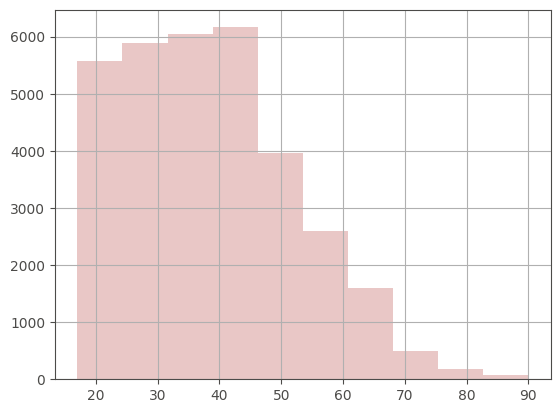

In [194]:
# Show Histogram
result.hist(bins=10, color=p_color).set_facecolor("none")

ax = plt.gca()
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)
ax.tick_params(axis='both', colors=t_color)

plt.gcf().set_facecolor("none")
# plt.savefig(attr_name + '_histogram.png', transparent=True)
plt.show()

In [195]:
# Show values in each bin
bin_edges = np.histogram_bin_edges(result, bins=10)
bin_counts, _ = np.histogram(result, bins=bin_edges)

bin_table = []
for i in range(len(bin_edges) - 1):
  bin_table.append([f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}", bin_counts[i]])

print(tabulate(bin_table, headers=['Range', 'Count'], tablefmt='grid'))

+---------------+---------+
| Range         |   Count |
+===============+=========+
| 17.00 - 24.30 |    5570 |
+---------------+---------+
| 24.30 - 31.60 |    5890 |
+---------------+---------+
| 31.60 - 38.90 |    6048 |
+---------------+---------+
| 38.90 - 46.20 |    6163 |
+---------------+---------+
| 46.20 - 53.50 |    3967 |
+---------------+---------+
| 53.50 - 60.80 |    2591 |
+---------------+---------+
| 60.80 - 68.10 |    1595 |
+---------------+---------+
| 68.10 - 75.40 |     496 |
+---------------+---------+
| 75.40 - 82.70 |     174 |
+---------------+---------+
| 82.70 - 90.00 |      67 |
+---------------+---------+


## fnlwgt

In [196]:
attr_name = 'fnlwgt'
result = data[attr_name]

In [197]:
# Show Parameters
table = []

print(attr_name)
table.append(['Skewness: ', f"{result.skew():,.4f}"])
table.append(['Mean: ', f"{result.mean():,.4f}"])
table.append(['Median: ', f"{result.median():,.4f}"])
table.append(['Mode: ', f"{result.mode().iloc[0]:,}"])
table.append(['SD: ', f"{result.std():,.4f}"])
table.append(['Variance: ', f"{result.var():,.4f}"])
table.append(['Min: ', f"{result.min():,}"])
table.append(['Q₁: ', f"{result.quantile(.25):,.4f}"])
table.append(['Q₂: ', f"{result.quantile(.50):,.4f}"])
table.append(['Q₃: ', f"{result.quantile(.75):,.4f}"])
table.append(['Max: ', f"{result.max():,}"])

print(tabulate(table, headers=['', 'Value'], tablefmt='grid'))


fnlwgt
+-----------+---------------------+
|           | Value               |
+===========+=====================+
| Skewness: | 1.4470              |
+-----------+---------------------+
| Mean:     | 189,778.3665        |
+-----------+---------------------+
| Median:   | 178,356.0000        |
+-----------+---------------------+
| Mode:     | 123,011             |
+-----------+---------------------+
| SD:       | 105,549.9777        |
+-----------+---------------------+
| Variance: | 11,140,797,791.8419 |
+-----------+---------------------+
| Min:      | 12,285              |
+-----------+---------------------+
| Q₁:       | 117,827.0000        |
+-----------+---------------------+
| Q₂:       | 178,356.0000        |
+-----------+---------------------+
| Q₃:       | 237,051.0000        |
+-----------+---------------------+
| Max:      | 1,484,705           |
+-----------+---------------------+


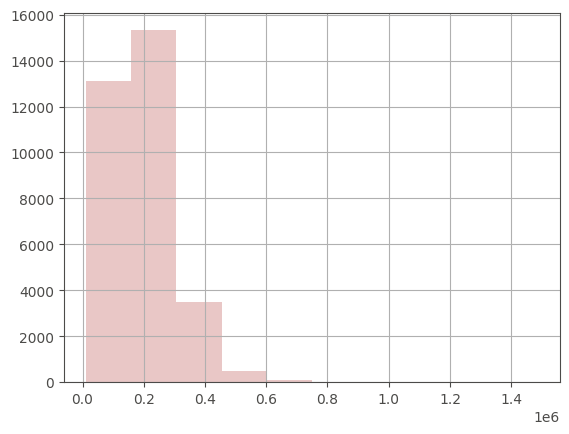

In [198]:
# Show Histogram
result.hist(bins=10, color=p_color).set_facecolor("none")

ax = plt.gca()
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)
ax.tick_params(axis='both', colors=t_color)

plt.gcf().set_facecolor("none")
# plt.savefig(attr_name + '_histogram.png', transparent=True)
plt.show()

In [199]:
# Show values in each bin
bin_edges = np.histogram_bin_edges(result, bins=10)
bin_counts, _ = np.histogram(result, bins=bin_edges)

bin_table = []
for i in range(len(bin_edges) - 1):
  bin_table.append([f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}", bin_counts[i]])

print(tabulate(bin_table, headers=['Range', 'Count'], tablefmt='grid'))

+-------------------------+---------+
| Range                   |   Count |
+=========================+=========+
| 12285.00 - 159527.00    |   13117 |
+-------------------------+---------+
| 159527.00 - 306769.00   |   15327 |
+-------------------------+---------+
| 306769.00 - 454011.00   |    3498 |
+-------------------------+---------+
| 454011.00 - 601253.00   |     477 |
+-------------------------+---------+
| 601253.00 - 748495.00   |     102 |
+-------------------------+---------+
| 748495.00 - 895737.00   |      20 |
+-------------------------+---------+
| 895737.00 - 1042979.00  |      10 |
+-------------------------+---------+
| 1042979.00 - 1190221.00 |       5 |
+-------------------------+---------+
| 1190221.00 - 1337463.00 |       2 |
+-------------------------+---------+
| 1337463.00 - 1484705.00 |       3 |
+-------------------------+---------+


## education-num

In [200]:
attr_name = 'education-num'
result = data[attr_name]

In [201]:
# Show Parameters
table = []

print(attr_name)
table.append(['Skewness: ', f"{result.skew():,.4f}"])
table.append(['Mean: ', f"{result.mean():,.4f}"])
table.append(['Median: ', f"{result.median():,.4f}"])
table.append(['Mode: ', f"{result.mode().iloc[0]:,}"])
table.append(['SD: ', f"{result.std():,.4f}"])
table.append(['Variance: ', f"{result.var():,.4f}"])
table.append(['Min: ', f"{result.min():,}"])
table.append(['Q₁: ', f"{result.quantile(.25):,.4f}"])
table.append(['Q₂: ', f"{result.quantile(.50):,.4f}"])
table.append(['Q₃: ', f"{result.quantile(.75):,.4f}"])
table.append(['Max: ', f"{result.max():,}"])

print(tabulate(table, headers=['', 'Value'], tablefmt='grid'))


education-num
+-----------+---------+
|           |   Value |
+===========+=========+
| Skewness: | -0.3117 |
+-----------+---------+
| Mean:     | 10.0807 |
+-----------+---------+
| Median:   | 10      |
+-----------+---------+
| Mode:     |  9      |
+-----------+---------+
| SD:       |  2.5727 |
+-----------+---------+
| Variance: |  6.6189 |
+-----------+---------+
| Min:      |  1      |
+-----------+---------+
| Q₁:       |  9      |
+-----------+---------+
| Q₂:       | 10      |
+-----------+---------+
| Q₃:       | 12      |
+-----------+---------+
| Max:      | 16      |
+-----------+---------+


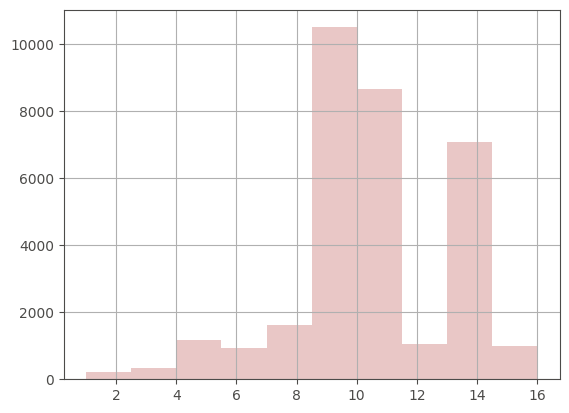

In [202]:
# Show Histogram
result.hist(bins=10, color=p_color).set_facecolor("none")

ax = plt.gca()
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)
ax.tick_params(axis='both', colors=t_color)

plt.gcf().set_facecolor("none")
# plt.savefig(attr_name + '_histogram.png', transparent=True)
plt.show()

In [203]:
# Show values in each bin
bin_edges = np.histogram_bin_edges(result, bins=10)
bin_counts, _ = np.histogram(result, bins=bin_edges)

bin_table = []
for i in range(len(bin_edges) - 1):
  bin_table.append([f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}", bin_counts[i]])

print(tabulate(bin_table, headers=['Range', 'Count'], tablefmt='grid'))

+---------------+---------+
| Range         |   Count |
+===============+=========+
| 1.00 - 2.50   |     219 |
+---------------+---------+
| 2.50 - 4.00   |     333 |
+---------------+---------+
| 4.00 - 5.50   |    1160 |
+---------------+---------+
| 5.50 - 7.00   |     933 |
+---------------+---------+
| 7.00 - 8.50   |    1608 |
+---------------+---------+
| 8.50 - 10.00  |   10501 |
+---------------+---------+
| 10.00 - 11.50 |    8673 |
+---------------+---------+
| 11.50 - 13.00 |    1067 |
+---------------+---------+
| 13.00 - 14.50 |    7078 |
+---------------+---------+
| 14.50 - 16.00 |     989 |
+---------------+---------+


## capital-gain

In [204]:
attr_name = 'capital-gain'
result = data[attr_name]

In [205]:
# Show Parameters
table = []

print(attr_name)
table.append(['Skewness: ', f"{result.skew():,.4f}"])
table.append(['Mean: ', f"{result.mean():,.4f}"])
table.append(['Median: ', f"{result.median():,.4f}"])
table.append(['Mode: ', f"{result.mode().iloc[0]:,}"])
table.append(['SD: ', f"{result.std():,.4f}"])
table.append(['Variance: ', f"{result.var():,.4f}"])
table.append(['Min: ', f"{result.min():,}"])
table.append(['Q₁: ', f"{result.quantile(.25):,.4f}"])
table.append(['Q₂: ', f"{result.quantile(.50):,.4f}"])
table.append(['Q₃: ', f"{result.quantile(.75):,.4f}"])
table.append(['Max: ', f"{result.max():,}"])

print(tabulate(table, headers=['', 'Value'], tablefmt='grid'))


capital-gain
+-----------+-----------------+
|           | Value           |
+===========+=================+
| Skewness: | 11.9538         |
+-----------+-----------------+
| Mean:     | 1,077.6488      |
+-----------+-----------------+
| Median:   | 0.0000          |
+-----------+-----------------+
| Mode:     | 0               |
+-----------+-----------------+
| SD:       | 7,385.2921      |
+-----------+-----------------+
| Variance: | 54,542,539.1784 |
+-----------+-----------------+
| Min:      | 0               |
+-----------+-----------------+
| Q₁:       | 0.0000          |
+-----------+-----------------+
| Q₂:       | 0.0000          |
+-----------+-----------------+
| Q₃:       | 0.0000          |
+-----------+-----------------+
| Max:      | 99,999          |
+-----------+-----------------+


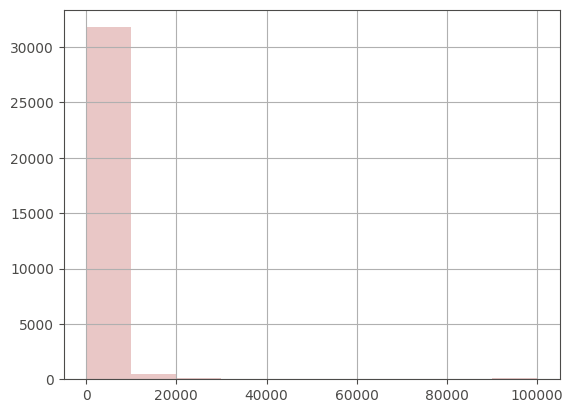

In [206]:
# Show Histogram
result.hist(bins=10, color=p_color).set_facecolor("none")

ax = plt.gca()
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)
ax.tick_params(axis='both', colors=t_color)

plt.gcf().set_facecolor("none")
# plt.savefig(attr_name + '_histogram.png', transparent=True)
plt.show()

In [207]:
# Show values in each bin
bin_edges = np.histogram_bin_edges(result, bins=10)
bin_counts, _ = np.histogram(result, bins=bin_edges)

bin_table = []
for i in range(len(bin_edges) - 1):
  bin_table.append([f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}", bin_counts[i]])

print(tabulate(bin_table, headers=['Range', 'Count'], tablefmt='grid'))

+---------------------+---------+
| Range               |   Count |
+=====================+=========+
| 0.00 - 9999.90      |   31791 |
+---------------------+---------+
| 9999.90 - 19999.80  |     517 |
+---------------------+---------+
| 19999.80 - 29999.70 |      87 |
+---------------------+---------+
| 29999.70 - 39999.60 |       5 |
+---------------------+---------+
| 39999.60 - 49999.50 |       2 |
+---------------------+---------+
| 49999.50 - 59999.40 |       0 |
+---------------------+---------+
| 59999.40 - 69999.30 |       0 |
+---------------------+---------+
| 69999.30 - 79999.20 |       0 |
+---------------------+---------+
| 79999.20 - 89999.10 |       0 |
+---------------------+---------+
| 89999.10 - 99999.00 |     159 |
+---------------------+---------+


## capital-loss

In [208]:
attr_name = 'capital-loss'
result = data[attr_name]

In [209]:
# Show Parameters
table = []

print(attr_name)
table.append(['Skewness: ', f"{result.skew():,.4f}"])
table.append(['Mean: ', f"{result.mean():,.4f}"])
table.append(['Median: ', f"{result.median():,.4f}"])
table.append(['Mode: ', f"{result.mode().iloc[0]:,}"])
table.append(['SD: ', f"{result.std():,.4f}"])
table.append(['Variance: ', f"{result.var():,.4f}"])
table.append(['Min: ', f"{result.min():,}"])
table.append(['Q₁: ', f"{result.quantile(.25):,.4f}"])
table.append(['Q₂: ', f"{result.quantile(.50):,.4f}"])
table.append(['Q₃: ', f"{result.quantile(.75):,.4f}"])
table.append(['Max: ', f"{result.max():,}"])

print(tabulate(table, headers=['', 'Value'], tablefmt='grid'))


capital-loss
+-----------+--------------+
|           | Value        |
+===========+==============+
| Skewness: | 4.5946       |
+-----------+--------------+
| Mean:     | 87.3038      |
+-----------+--------------+
| Median:   | 0.0000       |
+-----------+--------------+
| Mode:     | 0            |
+-----------+--------------+
| SD:       | 402.9602     |
+-----------+--------------+
| Variance: | 162,376.9378 |
+-----------+--------------+
| Min:      | 0            |
+-----------+--------------+
| Q₁:       | 0.0000       |
+-----------+--------------+
| Q₂:       | 0.0000       |
+-----------+--------------+
| Q₃:       | 0.0000       |
+-----------+--------------+
| Max:      | 4,356        |
+-----------+--------------+


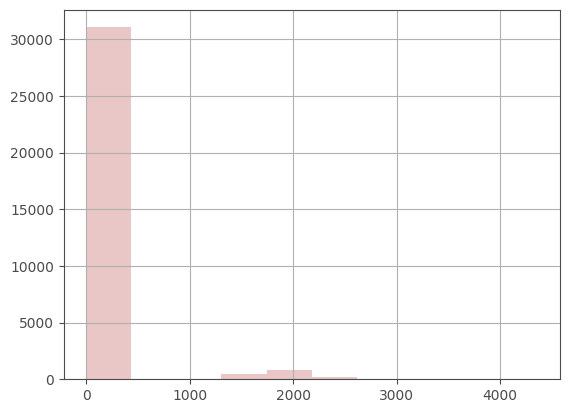

In [210]:
# Show Histogram
result.hist(bins=10, color=p_color).set_facecolor("none")

ax = plt.gca()
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)
ax.tick_params(axis='both', colors=t_color)

plt.gcf().set_facecolor("none")
# plt.savefig(attr_name + '_histogram.png', transparent=True)
plt.show()

In [211]:
# Show values in each bin
bin_edges = np.histogram_bin_edges(result, bins=10)
bin_counts, _ = np.histogram(result, bins=bin_edges)

bin_table = []
for i in range(len(bin_edges) - 1):
  bin_table.append([f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}", bin_counts[i]])

print(tabulate(bin_table, headers=['Range', 'Count'], tablefmt='grid'))

+-------------------+---------+
| Range             |   Count |
+===================+=========+
| 0.00 - 435.60     |   31053 |
+-------------------+---------+
| 435.60 - 871.20   |      17 |
+-------------------+---------+
| 871.20 - 1306.80  |      21 |
+-------------------+---------+
| 1306.80 - 1742.40 |     461 |
+-------------------+---------+
| 1742.40 - 2178.00 |     779 |
+-------------------+---------+
| 2178.00 - 2613.60 |     207 |
+-------------------+---------+
| 2613.60 - 3049.20 |      14 |
+-------------------+---------+
| 3049.20 - 3484.80 |       0 |
+-------------------+---------+
| 3484.80 - 3920.40 |       6 |
+-------------------+---------+
| 3920.40 - 4356.00 |       3 |
+-------------------+---------+


## hours-per-week

In [212]:
attr_name = 'hours-per-week'
result = data[attr_name]

In [213]:
# Show Parameters
table = []

print(attr_name)
table.append(['Skewness: ', f"{result.skew():,.4f}"])
table.append(['Mean: ', f"{result.mean():,.4f}"])
table.append(['Median: ', f"{result.median():,.4f}"])
table.append(['Mode: ', f"{result.mode().iloc[0]:,}"])
table.append(['SD: ', f"{result.std():,.4f}"])
table.append(['Variance: ', f"{result.var():,.4f}"])
table.append(['Min: ', f"{result.min():,}"])
table.append(['Q₁: ', f"{result.quantile(.25):,.4f}"])
table.append(['Q₂: ', f"{result.quantile(.50):,.4f}"])
table.append(['Q₃: ', f"{result.quantile(.75):,.4f}"])
table.append(['Max: ', f"{result.max():,}"])

print(tabulate(table, headers=['', 'Value'], tablefmt='grid'))


hours-per-week
+-----------+----------+
|           |    Value |
+===========+==========+
| Skewness: |   0.2276 |
+-----------+----------+
| Mean:     |  40.4375 |
+-----------+----------+
| Median:   |  40      |
+-----------+----------+
| Mode:     |  40      |
+-----------+----------+
| SD:       |  12.3474 |
+-----------+----------+
| Variance: | 152.459  |
+-----------+----------+
| Min:      |   1      |
+-----------+----------+
| Q₁:       |  40      |
+-----------+----------+
| Q₂:       |  40      |
+-----------+----------+
| Q₃:       |  45      |
+-----------+----------+
| Max:      |  99      |
+-----------+----------+


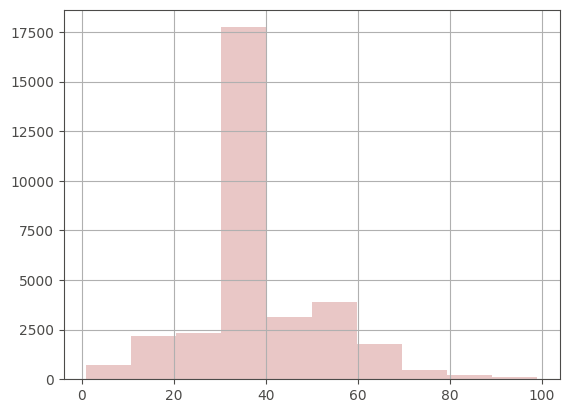

In [214]:
# Show Histogram
result.hist(bins=10, color=p_color).set_facecolor("none")

ax = plt.gca()
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)
ax.tick_params(axis='both', colors=t_color)

plt.gcf().set_facecolor("none")
# plt.savefig(attr_name + '_histogram.png', transparent=True)
plt.show()

In [215]:
# Show values in each bin
bin_edges = np.histogram_bin_edges(result, bins=10)
bin_counts, _ = np.histogram(result, bins=bin_edges)

bin_table = []
for i in range(len(bin_edges) - 1):
  bin_table.append([f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}", bin_counts[i]])

print(tabulate(bin_table, headers=['Range', 'Count'], tablefmt='grid'))

+---------------+---------+
| Range         |   Count |
+===============+=========+
| 1.00 - 10.80  |     736 |
+---------------+---------+
| 10.80 - 20.60 |    2192 |
+---------------+---------+
| 20.60 - 30.40 |    2317 |
+---------------+---------+
| 30.40 - 40.20 |   17735 |
+---------------+---------+
| 40.20 - 50.00 |    3119 |
+---------------+---------+
| 50.00 - 59.80 |    3877 |
+---------------+---------+
| 59.80 - 69.60 |    1796 |
+---------------+---------+
| 69.60 - 79.40 |     448 |
+---------------+---------+
| 79.40 - 89.20 |     202 |
+---------------+---------+
| 89.20 - 99.00 |     139 |
+---------------+---------+


# Categorical Attribute

## work-class

In [7]:
attr_name = 'work-class'
result = data[attr_name]

In [8]:
print(result.value_counts())
print('Unique: ', len(result.unique()))


work-class
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
Unique:  9


## education

In [218]:
attr_name = 'education'
result = data[attr_name]

In [219]:
print(result.value_counts())
print('Unique: ', len(result.unique()))

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
Unique:  16


## marital-status

In [220]:
attr_name = 'marital-status'
result = data[attr_name]

In [221]:
print(result.value_counts())
print('Unique: ', len(result.unique()))

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
Unique:  7


## occupation

In [222]:
attr_name = 'occupation'
result = data[attr_name]

In [223]:
print(result.value_counts())
print('Unique: ', len(result.unique()))

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64
Unique:  15


## relationship

In [224]:
attr_name = 'relationship'
result = data[attr_name]

In [225]:
print(result.value_counts())
print('Unique: ', len(result.unique()))

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64
Unique:  6


## race

In [226]:
attr_name = 'race'
result = data[attr_name]

In [227]:
print(result.value_counts())
print('Unique: ', len(result.unique()))

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64
Unique:  5


## sex

In [228]:
attr_name = 'sex'
result = data[attr_name]

In [229]:
print(result.value_counts())
print('Unique: ', len(result.unique()))

sex
Male      21790
Female    10771
Name: count, dtype: int64
Unique:  2


## native-country

In [9]:
attr_name = 'native-country'
result = data[attr_name]

In [10]:
print(result.value_counts())
print('Unique: ', len(result.unique()))

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

<Axes: xlabel='native-country', ylabel='count'>

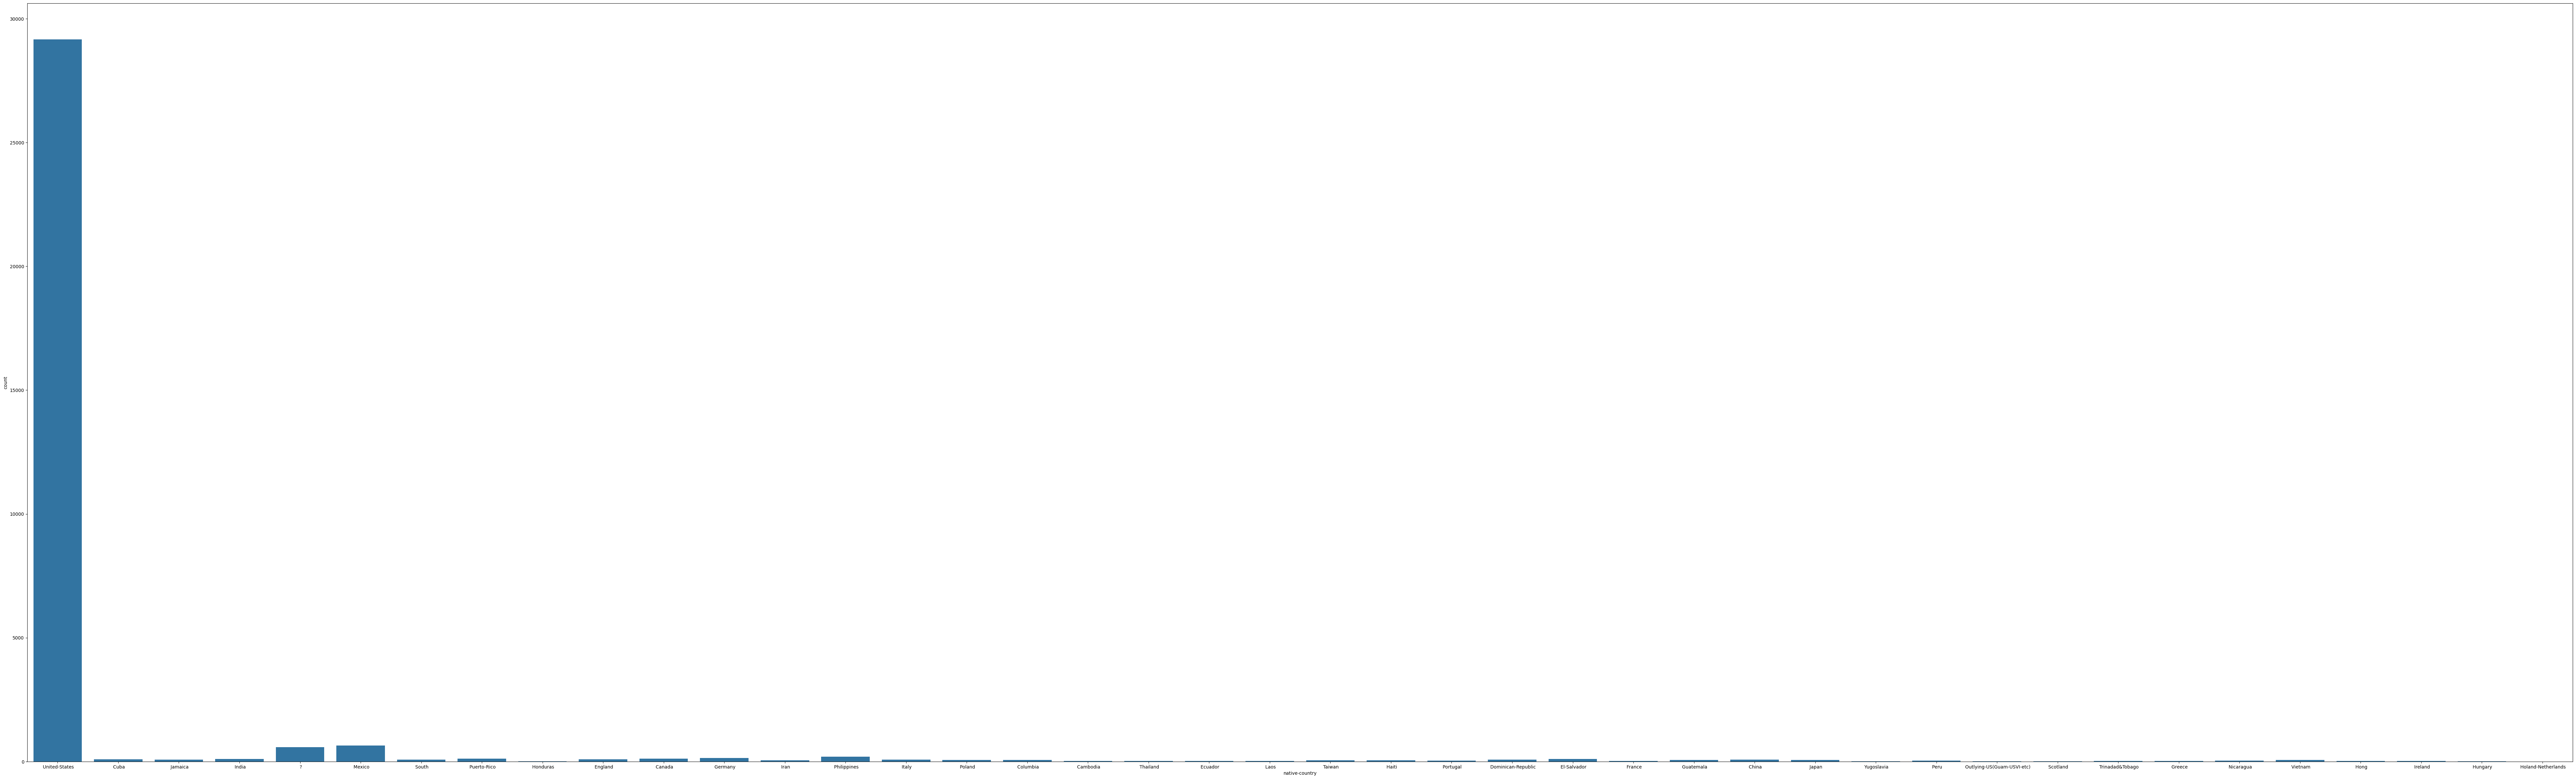

In [12]:
categorical_attributes = data.select_dtypes(include=['object'])
# Work-class Count plot
plt.figure(figsize=(100,30))
sns.countplot(data = categorical_attributes, x = attr_name)

## income

In [232]:
attr_name = 'income'
result = data[attr_name]

In [233]:
print(result.value_counts())
print('Unique: ', len(result.unique()))

income
<=50K    24720
>50K      7841
Name: count, dtype: int64
Unique:  2


# Preprocess

## Missing Data Handle

### แทนที่ข้อมูลว่าง ใน work-class

In [174]:
print("ก่อนการแทนที่ค่า:")
print(data['work-class'].value_counts())
print(len(data['work-class'].unique()))

data['work-class'] = data['work-class'].str.strip()
data['work-class'] = data['work-class'].replace('?', 'Private')

print("\nหลังการแทนที่ค่า:")
print(data['work-class'].value_counts())
print(len(data['work-class'].unique()))


ก่อนการแทนที่ค่า:
work-class
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
9

หลังการแทนที่ค่า:
work-class
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
8


### แทนที่ข้อมูลว่าง ใน Occupation

In [175]:
print("ก่อนการแทนที่ค่า:")
print(data['occupation'].value_counts())
print(len(data['occupation'].unique()))

data['occupation'] = data['occupation'].str.strip()
data['occupation'] = data['occupation'].replace('?', 'Other-service')

print("\nหลังการแทนที่ค่า:")
print(data['occupation'].value_counts())
print(len(data['occupation'].unique()))


ก่อนการแทนที่ค่า:
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64
15

หลังการแทนที่ค่า:
occupation
Other-service        5138
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64
14


## Group table

In [176]:
data['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [177]:
replace_edu = {'10th': 'HS-School', '11th': 'HS-School', '12th': 'HS-School',
    '7th-8th': 'JS-School', '9th': 'JS-School',
    '1st-4th': 'Elementary', '5th-6th': 'Elementary', 
    'HS-Grad': 'HS-School', 'HS-grad': 'HS-School',
    'Some-college': 'HS-School', 'Assoc-acdm': 'Assoc-Degree', 'Assoc-voc': 'Assoc-Degree'}

data['education'] = data['education'].str.strip()
data['education'] = data['education'].replace(replace_edu)

print(data['education'].value_counts())
print(len(data['education'].unique()))

education
HS-School       20333
Bachelors        5355
Assoc-Degree     2449
Masters          1723
JS-School        1160
Prof-school       576
Elementary        501
Doctorate         413
Preschool          51
Name: count, dtype: int64
9


## กำจัด Outliers

### Age

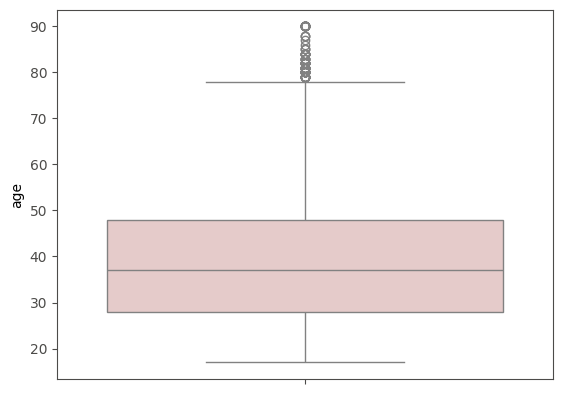

Lower Bound -2.0
Upper Bound 78.0


In [235]:
# สร้าง boxplot
ax = sns.boxplot(data=data['age'], color=p_color)
ax.set_facecolor("none")

# ปรับสีของ spines (เส้นขอบกราฟ)
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)

# ปรับสีของ ticks และ labels
ax.tick_params(axis='both', colors=t_color)

# ปรับสีของ figure
plt.gcf().set_facecolor("none")
plt.show()

Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower Bound', lower_bound)
print('Upper Bound', upper_bound)

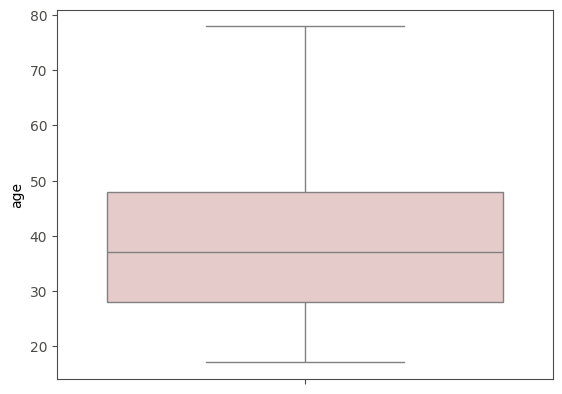

In [ ]:
data['age'] = data['age'].clip(lower=lower_bound, upper=upper_bound)

# สร้าง boxplot
ax = sns.boxplot(data=data['age'], color=p_color)
ax.set_facecolor("none")

# ปรับสีของ spines (เส้นขอบกราฟ)
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)

# ปรับสีของ ticks และ labels
ax.tick_params(axis='both', colors=t_color)

# ปรับสีของ figure
plt.gcf().set_facecolor("none")
plt.show()

In [242]:
attr_name = 'age'
result = data[attr_name]

In [244]:
# Show Parameters
table = []

print(attr_name)
table.append(['Skewness: ', f"{result.skew():,.4f}"])
table.append(['Mean: ', f"{result.mean():,.4f}"])
table.append(['Median: ', f"{result.median():,.4f}"])
table.append(['Mode: ', f"{result.mode().iloc[0]:,}"])
table.append(['SD: ', f"{result.std():,.4f}"])
table.append(['Variance: ', f"{result.var():,.4f}"])
table.append(['Min: ', f"{result.min():,}"])
table.append(['Q₁: ', f"{result.quantile(.25):,.4f}"])
table.append(['Q₂: ', f"{result.quantile(.50):,.4f}"])
table.append(['Q₃: ', f"{result.quantile(.75):,.4f}"])
table.append(['Max: ', f"{result.max():,}"])

print(tabulate(table, headers=['', 'Value'], tablefmt='grid'))


age
+-----------+----------+
|           |    Value |
+===========+==========+
| Skewness: |   0.5139 |
+-----------+----------+
| Mean:     |  38.5556 |
+-----------+----------+
| Median:   |  37      |
+-----------+----------+
| Mode:     |  36      |
+-----------+----------+
| SD:       |  13.5561 |
+-----------+----------+
| Variance: | 183.769  |
+-----------+----------+
| Min:      |  17      |
+-----------+----------+
| Q₁:       |  28      |
+-----------+----------+
| Q₂:       |  37      |
+-----------+----------+
| Q₃:       |  48      |
+-----------+----------+
| Max:      |  78      |
+-----------+----------+


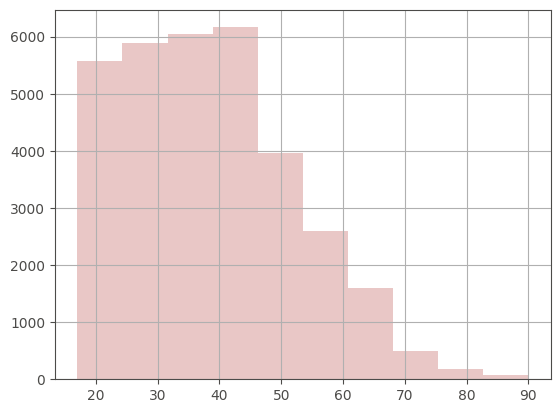

In [239]:
# Show Histogram
result.hist(bins=10, color=p_color).set_facecolor("none")

ax = plt.gca()
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)
ax.tick_params(axis='both', colors=t_color)

plt.gcf().set_facecolor("none")
# plt.savefig(attr_name + '_histogram.png', transparent=True)
plt.show()

In [245]:
# Show values in each bin
bin_edges = np.histogram_bin_edges(result, bins=10)
bin_counts, _ = np.histogram(result, bins=bin_edges)

bin_table = []
for i in range(len(bin_edges) - 1):
  bin_table.append([f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}", bin_counts[i]])

print(tabulate(bin_table, headers=['Range', 'Count'], tablefmt='grid'))

+---------------+---------+
| Range         |   Count |
+===============+=========+
| 17.00 - 23.10 |    4772 |
+---------------+---------+
| 23.10 - 29.20 |    4939 |
+---------------+---------+
| 29.20 - 35.30 |    5214 |
+---------------+---------+
| 35.30 - 41.40 |    5001 |
+---------------+---------+
| 41.40 - 47.50 |    4453 |
+---------------+---------+
| 47.50 - 53.60 |    3259 |
+---------------+---------+
| 53.60 - 59.70 |    2279 |
+---------------+---------+
| 59.70 - 65.80 |    1486 |
+---------------+---------+
| 65.80 - 71.90 |     690 |
+---------------+---------+
| 71.90 - 78.00 |     468 |
+---------------+---------+


### Hours-per-week

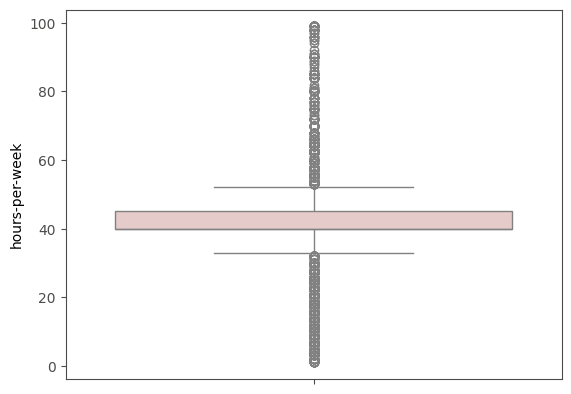

Lower Bound 32.5
Upper Bound 52.5


In [246]:
# สร้าง boxplot
ax = sns.boxplot(data=data['hours-per-week'], color=p_color)
ax.set_facecolor("none")

# ปรับสีของ spines (เส้นขอบกราฟ)
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)

# ปรับสีของ ticks และ labels
ax.tick_params(axis='both', colors=t_color)

# ปรับสีของ figure
plt.gcf().set_facecolor("none")
plt.show()

Q1 = data['hours-per-week'].quantile(0.25)
Q3 = data['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower Bound', lower_bound)
print('Upper Bound', upper_bound)

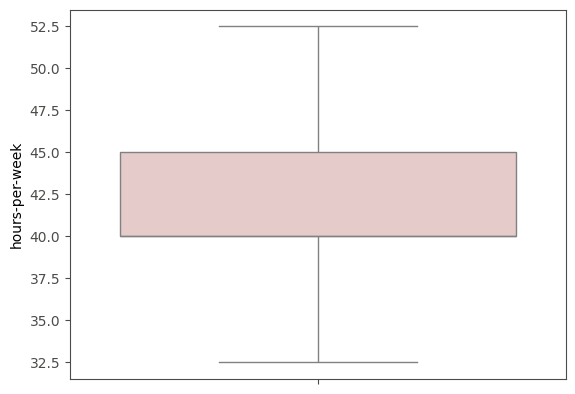

In [247]:
data['hours-per-week'] = data['hours-per-week'].clip(lower=lower_bound, upper=upper_bound)

# สร้าง boxplot
ax = sns.boxplot(data=data['hours-per-week'], color=p_color)
ax.set_facecolor("none")

# ปรับสีของ spines (เส้นขอบกราฟ)
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)

# ปรับสีของ ticks และ labels
ax.tick_params(axis='both', colors=t_color)

# ปรับสีของ figure
plt.gcf().set_facecolor("none")
plt.show()

In [248]:
attr_name = 'hours-per-week'
result = data[attr_name]

In [249]:
# Show Parameters
table = []

print(attr_name)
table.append(['Skewness: ', f"{result.skew():,.4f}"])
table.append(['Mean: ', f"{result.mean():,.4f}"])
table.append(['Median: ', f"{result.median():,.4f}"])
table.append(['Mode: ', f"{result.mode().iloc[0]:,}"])
table.append(['SD: ', f"{result.std():,.4f}"])
table.append(['Variance: ', f"{result.var():,.4f}"])
table.append(['Min: ', f"{result.min():,}"])
table.append(['Q₁: ', f"{result.quantile(.25):,.4f}"])
table.append(['Q₂: ', f"{result.quantile(.50):,.4f}"])
table.append(['Q₃: ', f"{result.quantile(.75):,.4f}"])
table.append(['Max: ', f"{result.max():,}"])

print(tabulate(table, headers=['', 'Value'], tablefmt='grid'))


hours-per-week
+-----------+---------+
|           |   Value |
+===========+=========+
| Skewness: |  0.4383 |
+-----------+---------+
| Mean:     | 41.2025 |
+-----------+---------+
| Median:   | 40      |
+-----------+---------+
| Mode:     | 40      |
+-----------+---------+
| SD:       |  6.187  |
+-----------+---------+
| Variance: | 38.279  |
+-----------+---------+
| Min:      | 32.5    |
+-----------+---------+
| Q₁:       | 40      |
+-----------+---------+
| Q₂:       | 40      |
+-----------+---------+
| Q₃:       | 45      |
+-----------+---------+
| Max:      | 52.5    |
+-----------+---------+


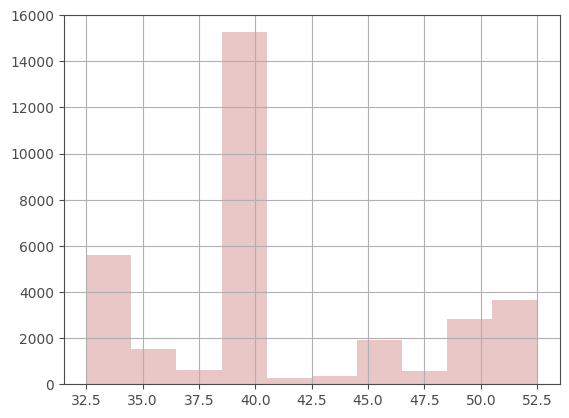

In [250]:
# Show Histogram
result.hist(bins=10, color=p_color).set_facecolor("none")

ax = plt.gca()
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)
ax.tick_params(axis='both', colors=t_color)

plt.gcf().set_facecolor("none")
# plt.savefig(attr_name + '_histogram.png', transparent=True)
plt.show()

In [251]:
# Show values in each bin
bin_edges = np.histogram_bin_edges(result, bins=10)
bin_counts, _ = np.histogram(result, bins=bin_edges)

bin_table = []
for i in range(len(bin_edges) - 1):
  bin_table.append([f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}", bin_counts[i]])

print(tabulate(bin_table, headers=['Range', 'Count'], tablefmt='grid'))

+---------------+---------+
| Range         |   Count |
+===============+=========+
| 32.50 - 34.50 |    5583 |
+---------------+---------+
| 34.50 - 36.50 |    1517 |
+---------------+---------+
| 36.50 - 38.50 |     625 |
+---------------+---------+
| 38.50 - 40.50 |   15255 |
+---------------+---------+
| 40.50 - 42.50 |     255 |
+---------------+---------+
| 42.50 - 44.50 |     363 |
+---------------+---------+
| 44.50 - 46.50 |    1906 |
+---------------+---------+
| 46.50 - 48.50 |     566 |
+---------------+---------+
| 48.50 - 50.50 |    2848 |
+---------------+---------+
| 50.50 - 52.50 |    3643 |
+---------------+---------+
